# Exploración Inicial del Dataset IGAC

Este notebook realiza una exploración inicial del dataset de transacciones inmobiliarias del IGAC (2015-2023).

## Objetivos
1. Entender la estructura del dataset
2. Analizar estadísticas descriptivas básicas
3. Identificar problemas de calidad de datos
4. Visualizar distribuciones principales

In [1]:
# Importar librerías
import sys
sys.path.append('../src')

import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from etl.data_loader import get_dataset_info, load_csv_sample
from utils.config import IGAC_CSV_FILE

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

## 1. Información General del Dataset

In [2]:
# Obtener información del archivo
info = get_dataset_info()

print("="*60)
print("INFORMACIÓN DEL DATASET")
print("="*60)
print(f"Archivo: {info['file_path']}")
print(f"Tamaño: {info['file_size_gb']} GB")
print(f"Número de columnas: {info['num_columns']}")
print(f"Filas estimadas: {info['estimated_rows']:,}")
print("\nColumnas:")
for i, col in enumerate(info['columns'], 1):
    print(f"  {i:2d}. {col}")

INFORMACIÓN DEL DATASET
Archivo: d:\conscursoOpendata\igac-anomalias-inmobiliarias\notebooks\..\data\raw\IGAC_2015_-_2023.csv
Tamaño: 8.82 GB
Número de columnas: 26
Filas estimadas: 30,903,248

Columnas:
   1. PK
   2. MATRICULA
   3. FECHA_RADICA_TEXTO
   4. FECHA_APERTURA_TEXTO
   5. YEAR_RADICA
   6. ORIP
   7. DIVIPOLA
   8. DEPARTAMENTO
   9. MUNICIPIO
  10. TIPO_PREDIO_ZONA
  11. CATEGORIA_RURALIDAD
  12. NUM_ANOTACION
  13. ESTADO_FOLIO
  14. FOLIOS_DERIVADOS
  15. Dinámica_Inmobiliaria
  16. COD_NATUJUR
  17. NOMBRE_NATUJUR
  18. NUMERO_CATASTRAL
  19. NUMERO_CATASTRAL_ANTIGUO
  20. DOCUMENTO_JUSTIFICATIVO
  21. COUNT_A
  22. COUNT_DE
  23. PREDIOS_NUEVOS
  24. TIENE_VALOR
  25. TIENE_MAS_DE_UN_VALOR
  26. VALOR


## 2. Carga de Muestra

In [3]:
# Cargar muestra de 100,000 registros
df_sample = load_csv_sample(n_rows=100000, use_polars=True)
print(f"\nMuestra cargada: {df_sample.shape[0]:,} filas, {df_sample.shape[1]} columnas")

Cargando muestra de 100000 filas...
✓ Muestra cargada: 100000 filas, 26 columnas

Muestra cargada: 100,000 filas, 26 columnas


In [4]:
# Ver primeras filas
df_sample.head(10)

PK,MATRICULA,FECHA_RADICA_TEXTO,FECHA_APERTURA_TEXTO,YEAR_RADICA,ORIP,DIVIPOLA,DEPARTAMENTO,MUNICIPIO,TIPO_PREDIO_ZONA,CATEGORIA_RURALIDAD,NUM_ANOTACION,ESTADO_FOLIO,FOLIOS_DERIVADOS,Dinámica_Inmobiliaria,COD_NATUJUR,NOMBRE_NATUJUR,NUMERO_CATASTRAL,NUMERO_CATASTRAL_ANTIGUO,DOCUMENTO_JUSTIFICATIVO,COUNT_A,COUNT_DE,PREDIOS_NUEVOS,TIENE_VALOR,TIENE_MAS_DE_UN_VALOR,VALOR
str,str,str,datetime[μs],i64,i64,i64,str,str,str,str,i64,str,str,i64,i64,str,str,str,str,i64,i64,i64,i64,i64,str
"""05001-001-000013-00014-00313-2…","""001-13""","""2018-02-05 00:00:00""",1973-01-11 00:00:00,2018,1,5001,"""ANTIOQUIA""","""MEDELLÍN""","""URBANO""","""Ciudades y aglomeraciones""",14,null,null,0,313,"""CONSTITUCIÓN DE FIDEICOMISO CI…",null,null,"""01-ESCRITURA 3321 DE 22-12-201…",2,1,0,0,0,null
"""05001-001-000014-00015-00313-2…","""001-14""","""2018-02-05 00:00:00""",1973-01-11 00:00:00,2018,1,5001,"""ANTIOQUIA""","""MEDELLÍN""","""URBANO""","""Ciudades y aglomeraciones""",15,null,null,0,313,"""CONSTITUCIÓN DE FIDEICOMISO CI…",null,null,"""01-ESCRITURA 3321 DE 22-12-201…",2,1,0,0,0,null
"""05001-001-000023-00007-00109-2…","""001-23""","""2020-12-02 00:00:00""",1973-01-10 00:00:00,2020,1,5001,"""ANTIOQUIA""","""MEDELLÍN""","""URBANO""","""Ciudades y aglomeraciones""",7,null,null,1,109,"""ADJUDICACIÓN EN SUCESION""",null,null,"""01-ESCRITURA 3322 DE 30-10-202…",5,1,0,0,0,null
"""05001-001-000065-00013-00317-2…","""001-65""","""2015-12-16 00:00:00""",1973-01-10 00:00:00,2015,1,5001,"""ANTIOQUIA""","""MEDELLÍN""","""URBANO""","""Ciudades y aglomeraciones""",13,null,null,1,317,"""CONSTITUCIÓN REGLAMENTO DE PRO…",null,null,"""01-ESCRITURA 8145 DE 04-12-201…",0,1,0,0,0,null
"""05001-001-000067-00014-00109-2…","""001-67""","""2016-03-29 00:00:00""",1973-01-11 00:00:00,2016,1,5001,"""ANTIOQUIA""","""MEDELLÍN""","""URBANO""","""Ciudades y aglomeraciones""",14,null,null,1,109,"""ADJUDICACIÓN EN SUCESION""",null,null,"""01-ESCRITURA 1266 DE 10-03-201…",1,1,0,0,0,null
"""05002-002-006532-00011-00125-2…","""002-6532""","""29/09/2016""",null,2016,2,5002,"""ANTIOQUIA""","""ABEJORRAL""","""URBANO""","""Rural""",11,"""ACTIVO""",null,1,125,"""COMPRAVENTA""",null,null,"""00-ESCRITURA 434 DE 20/09/2016…",1,1,0,1,0,"""5,000,000"""
"""05002-002-006532-00012-00125-2…","""002-6532""","""02/12/2016""",null,2016,2,5002,"""ANTIOQUIA""","""ABEJORRAL""","""URBANO""","""Rural""",12,"""ACTIVO""",null,1,125,"""COMPRAVENTA""",null,null,"""00-ESCRITURA 537 DE 28/11/2016…",2,1,0,1,0,"""3,100,000"""
"""05002-002-008032-00012-00125-2…","""002-8032""","""21/09/21""",1994-01-11 00:00:00,2021,2,5002,"""ANTIOQUIA""","""ABEJORRAL""","""RURAL""","""Rural""",12,"""ACTIVO""",null,1,125,"""COMPRAVENTA""",null,null,"""00-ESCRITURA 1338 DEL 07/09/21…",1,1,0,1,0,"""230,000,000"""
"""05002-002-008032-00013-00125-2…","""002-8032""","""28/12/22""",1994-01-11 00:00:00,2022,2,5002,"""ANTIOQUIA""","""ABEJORRAL""","""RURAL""","""Rural""",13,"""ACTIVO""",null,1,125,"""COMPRAVENTA""",null,null,"""00-ESCRITURA 2074 DEL 01/12/22…",1,1,0,1,0,"""1,420,649,980"""


## 3. Análisis de Tipos de Datos

In [5]:
# Esquema del dataset
print("\nEsquema del Dataset:")
print(df_sample.schema)


Esquema del Dataset:
Schema({'PK': String, 'MATRICULA': String, 'FECHA_RADICA_TEXTO': String, 'FECHA_APERTURA_TEXTO': Datetime(time_unit='us', time_zone=None), 'YEAR_RADICA': Int64, 'ORIP': Int64, 'DIVIPOLA': Int64, 'DEPARTAMENTO': String, 'MUNICIPIO': String, 'TIPO_PREDIO_ZONA': String, 'CATEGORIA_RURALIDAD': String, 'NUM_ANOTACION': Int64, 'ESTADO_FOLIO': String, 'FOLIOS_DERIVADOS': String, 'Dinámica_Inmobiliaria': Int64, 'COD_NATUJUR': Int64, 'NOMBRE_NATUJUR': String, 'NUMERO_CATASTRAL': String, 'NUMERO_CATASTRAL_ANTIGUO': String, 'DOCUMENTO_JUSTIFICATIVO': String, 'COUNT_A': Int64, 'COUNT_DE': Int64, 'PREDIOS_NUEVOS': Int64, 'TIENE_VALOR': Int64, 'TIENE_MAS_DE_UN_VALOR': Int64, 'VALOR': String})


## 4. Análisis de Valores Nulos

In [6]:
# Contar valores nulos por columna
null_counts = df_sample.null_count()
null_df = pl.DataFrame({
    'Columna': df_sample.columns,
    'Nulos': [null_counts[col][0] for col in df_sample.columns],
    'Porcentaje': [(null_counts[col][0] / len(df_sample)) * 100 for col in df_sample.columns]
})

null_df = null_df.filter(pl.col('Nulos') > 0).sort('Nulos', descending=True)
print("\nColumnas con valores nulos:")
print(null_df)


Columnas con valores nulos:
shape: (7, 3)
┌──────────────────────────┬────────┬────────────┐
│ Columna                  ┆ Nulos  ┆ Porcentaje │
│ ---                      ┆ ---    ┆ ---        │
│ str                      ┆ i64    ┆ f64        │
╞══════════════════════════╪════════╪════════════╡
│ NUMERO_CATASTRAL         ┆ 100000 ┆ 100.0      │
│ NUMERO_CATASTRAL_ANTIGUO ┆ 100000 ┆ 100.0      │
│ FOLIOS_DERIVADOS         ┆ 99783  ┆ 99.783     │
│ ESTADO_FOLIO             ┆ 93872  ┆ 93.872     │
│ VALOR                    ┆ 82767  ┆ 82.767     │
│ FECHA_APERTURA_TEXTO     ┆ 4201   ┆ 4.201      │
│ COD_NATUJUR              ┆ 66     ┆ 0.066      │
└──────────────────────────┴────────┴────────────┘


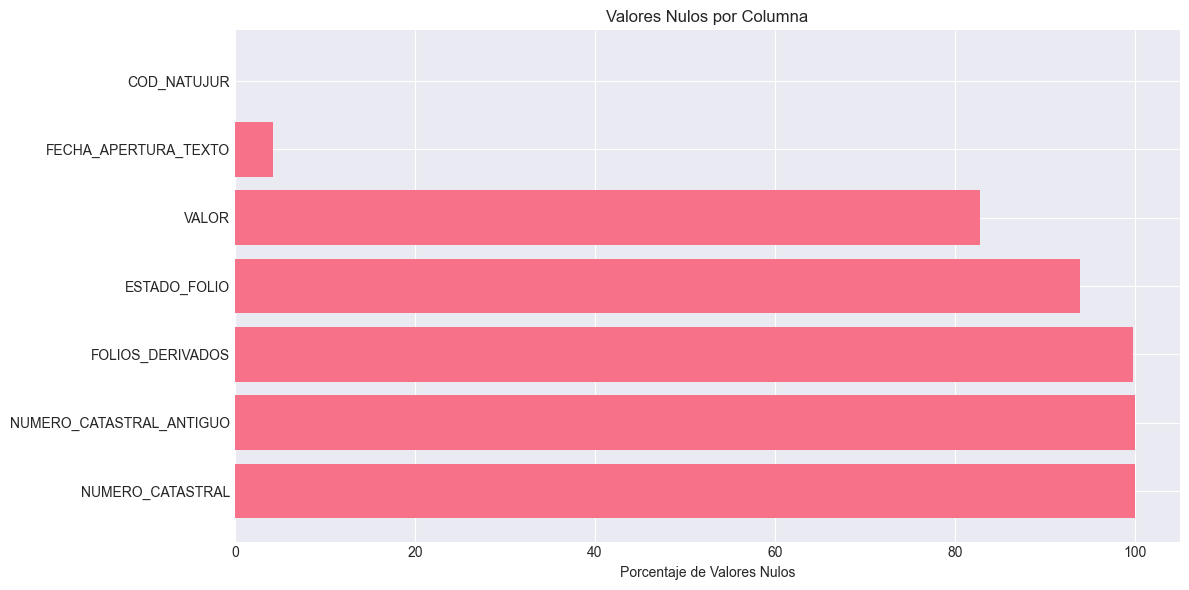

In [7]:
# Visualizar valores nulos
if len(null_df) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(null_df['Columna'].to_list(), null_df['Porcentaje'].to_list())
    plt.xlabel('Porcentaje de Valores Nulos')
    plt.title('Valores Nulos por Columna')
    plt.tight_layout()
    plt.show()

## 5. Estadísticas Descriptivas

In [8]:
# Estadísticas de columnas numéricas
df_sample.describe()

statistic,PK,MATRICULA,FECHA_RADICA_TEXTO,FECHA_APERTURA_TEXTO,YEAR_RADICA,ORIP,DIVIPOLA,DEPARTAMENTO,MUNICIPIO,TIPO_PREDIO_ZONA,CATEGORIA_RURALIDAD,NUM_ANOTACION,ESTADO_FOLIO,FOLIOS_DERIVADOS,Dinámica_Inmobiliaria,COD_NATUJUR,NOMBRE_NATUJUR,NUMERO_CATASTRAL,NUMERO_CATASTRAL_ANTIGUO,DOCUMENTO_JUSTIFICATIVO,COUNT_A,COUNT_DE,PREDIOS_NUEVOS,TIENE_VALOR,TIENE_MAS_DE_UN_VALOR,VALOR
str,str,str,str,str,f64,f64,f64,str,str,str,str,f64,str,str,f64,f64,str,str,str,str,f64,f64,f64,f64,f64,str
"""count""","""100000""","""100000""","""100000""","""95799""",100000.0,100000.0,100000.0,"""100000""","""100000""","""100000""","""100000""",100000.0,"""6128""","""217""",100000.0,99934.0,"""100000""","""0""","""0""","""100000""",100000.0,100000.0,100000.0,100000.0,100000.0,"""17233"""
"""null_count""","""0""","""0""","""0""","""4201""",0.0,0.0,0.0,"""0""","""0""","""0""","""0""",0.0,"""93872""","""99783""",0.0,66.0,"""0""","""100000""","""100000""","""0""",0.0,0.0,0.0,0.0,0.0,"""82767"""
"""mean""",null,null,null,"""2003-03-17 14:27:27.129719""",2019.02742,14.92649,7183.32689,null,null,null,null,10.52787,null,null,0.55308,476.124002,null,null,null,null,0.83907,1.19014,0.03416,0.17233,0.00002,null
"""std""",null,null,null,null,2.744151,59.241166,10188.225985,null,null,null,null,6.9841,null,null,0.497177,324.776674,null,null,null,null,1.935642,0.875759,0.181641,0.377669,0.004472,null
"""min""","""05001-001-000013-00014-00313-2…","""001-1000000""","""01/02/2018""","""1903-07-01 00:00:00""",2015.0,1.0,5001.0,"""ANTIOQUIA""","""ABEJORRAL""","""RURAL""","""Ciudades y aglomeraciones""",1.0,"""ACTIVO""","""027-30537""",0.0,101.0,"""ACLARACIÓN""",null,null,"""00-AUTO . DE 20/04/2015; JUZG…",0.0,0.0,0.0,0.0,0.0,"""0"""
"""25%""",null,null,null,"""2008-12-23 00:00:00""",2016.0,1.0,5001.0,null,null,null,null,7.0,null,null,0.0,205.0,null,null,null,null,0.0,1.0,0.0,0.0,0.0,null
"""50%""",null,null,null,"""2009-08-25 00:00:00""",2019.0,1.0,5001.0,null,null,null,null,9.0,null,null,1.0,313.0,null,null,null,null,1.0,1.0,0.0,0.0,0.0,null
"""75%""",null,null,null,"""2010-05-18 00:00:00""",2022.0,1.0,5001.0,null,null,null,null,13.0,null,null,1.0,842.0,null,null,null,null,1.0,1.0,0.0,0.0,0.0,null
"""max""","""86885-440-078309-00001-00125-2…","""475-42950""","""31/10/2019""","""2022-12-19 10:10:52""",2023.0,475.0,86885.0,"""TOLIMA""","""ÚMBITA""","""URBANO""","""Rural disperso""",310.0,"""CERRADO""","""232-56193""",1.0,972.0,"""VALORIZACIÓN""",null,null,"""99-SIN INFORMACION SN DE 18-07…",82.0,34.0,1.0,1.0,1.0,"""991,699,970"""


## 6. Análisis Temporal

In [9]:
# Distribución por año
year_dist = df_sample.group_by('YEAR_RADICA').agg([
    pl.count().alias('Cantidad')
]).sort('YEAR_RADICA')

print("\nDistribución de transacciones por año:")
print(year_dist)


Distribución de transacciones por año:
shape: (9, 2)
┌─────────────┬──────────┐
│ YEAR_RADICA ┆ Cantidad │
│ ---         ┆ ---      │
│ i64         ┆ u32      │
╞═════════════╪══════════╡
│ 2015        ┆ 8168     │
│ 2016        ┆ 22497    │
│ 2017        ┆ 6673     │
│ 2018        ┆ 9252     │
│ 2019        ┆ 6179     │
│ 2020        ┆ 8834     │
│ 2021        ┆ 9623     │
│ 2022        ┆ 17673    │
│ 2023        ┆ 11101    │
└─────────────┴──────────┘


C:\Users\Dylber Cabrera\AppData\Local\Temp\ipykernel_29656\3128229015.py:3: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias('Cantidad')


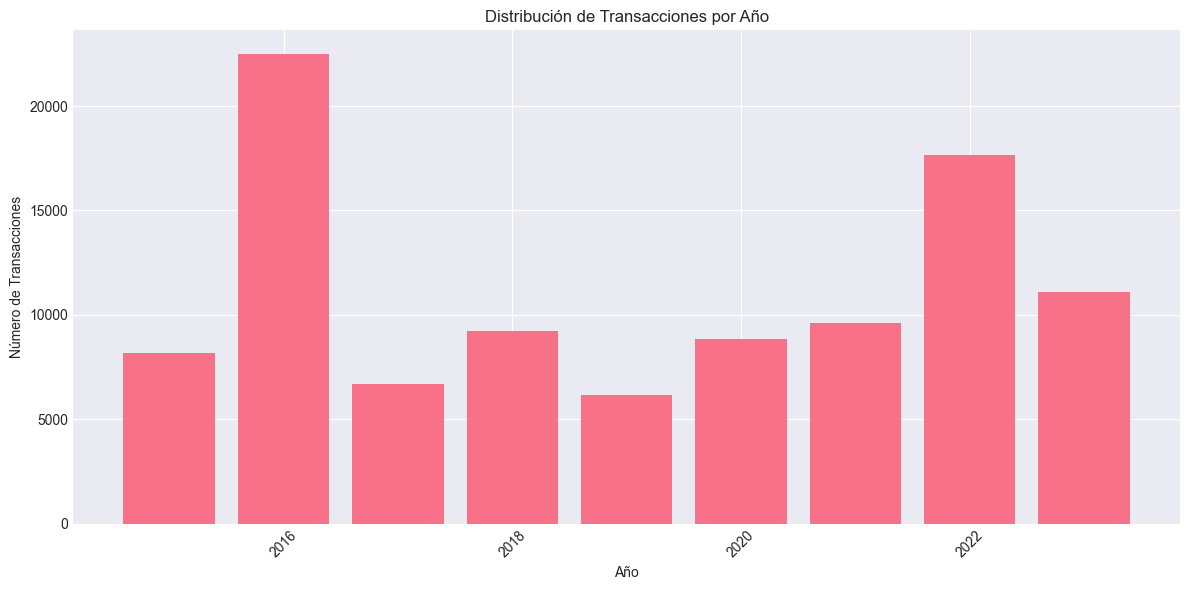

In [10]:
# Visualizar distribución temporal
plt.figure(figsize=(12, 6))
plt.bar(year_dist['YEAR_RADICA'].to_list(), year_dist['Cantidad'].to_list())
plt.xlabel('Año')
plt.ylabel('Número de Transacciones')
plt.title('Distribución de Transacciones por Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Análisis Geográfico

In [11]:
# Top 10 departamentos por volumen de transacciones
top_depts = df_sample.group_by('DEPARTAMENTO').agg([
    pl.count().alias('Transacciones')
]).sort('Transacciones', descending=True).head(10)

print("\nTop 10 Departamentos por Volumen:")
print(top_depts)


Top 10 Departamentos por Volumen:
shape: (10, 2)
┌──────────────┬───────────────┐
│ DEPARTAMENTO ┆ Transacciones │
│ ---          ┆ ---           │
│ str          ┆ u32           │
╞══════════════╪═══════════════╡
│ ANTIOQUIA    ┆ 94046         │
│ CESAR        ┆ 1150          │
│ HUILA        ┆ 1004          │
│ TOLIMA       ┆ 903           │
│ SANTANDER    ┆ 454           │
│ BOLÍVAR      ┆ 431           │
│ CÓRDOBA      ┆ 426           │
│ CHOCÓ        ┆ 371           │
│ NARIÑO       ┆ 298           │
│ MAGDALENA    ┆ 282           │
└──────────────┴───────────────┘


C:\Users\Dylber Cabrera\AppData\Local\Temp\ipykernel_29656\4223424003.py:3: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias('Transacciones')


In [12]:
# Top 15 municipios
top_munis = df_sample.group_by('MUNICIPIO').agg([
    pl.count().alias('Transacciones')
]).sort('Transacciones', descending=True).head(15)

print("\nTop 15 Municipios por Volumen:")
print(top_munis)


Top 15 Municipios por Volumen:
shape: (15, 2)
┌─────────────┬───────────────┐
│ MUNICIPIO   ┆ Transacciones │
│ ---         ┆ ---           │
│ str         ┆ u32           │
╞═════════════╪═══════════════╡
│ MEDELLÍN    ┆ 93299         │
│ ESPINAL     ┆ 714           │
│ SAN MARTÍN  ┆ 471           │
│ SAN PABLO   ┆ 431           │
│ ISTMINA     ┆ 337           │
│ …           ┆ …             │
│ CAMPOALEGRE ┆ 248           │
│ AMAGÁ       ┆ 226           │
│ RÍO DE ORO  ┆ 212           │
│ PAILITAS    ┆ 173           │
│ LA PAZ      ┆ 163           │
└─────────────┴───────────────┘


C:\Users\Dylber Cabrera\AppData\Local\Temp\ipykernel_29656\1127428176.py:3: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias('Transacciones')


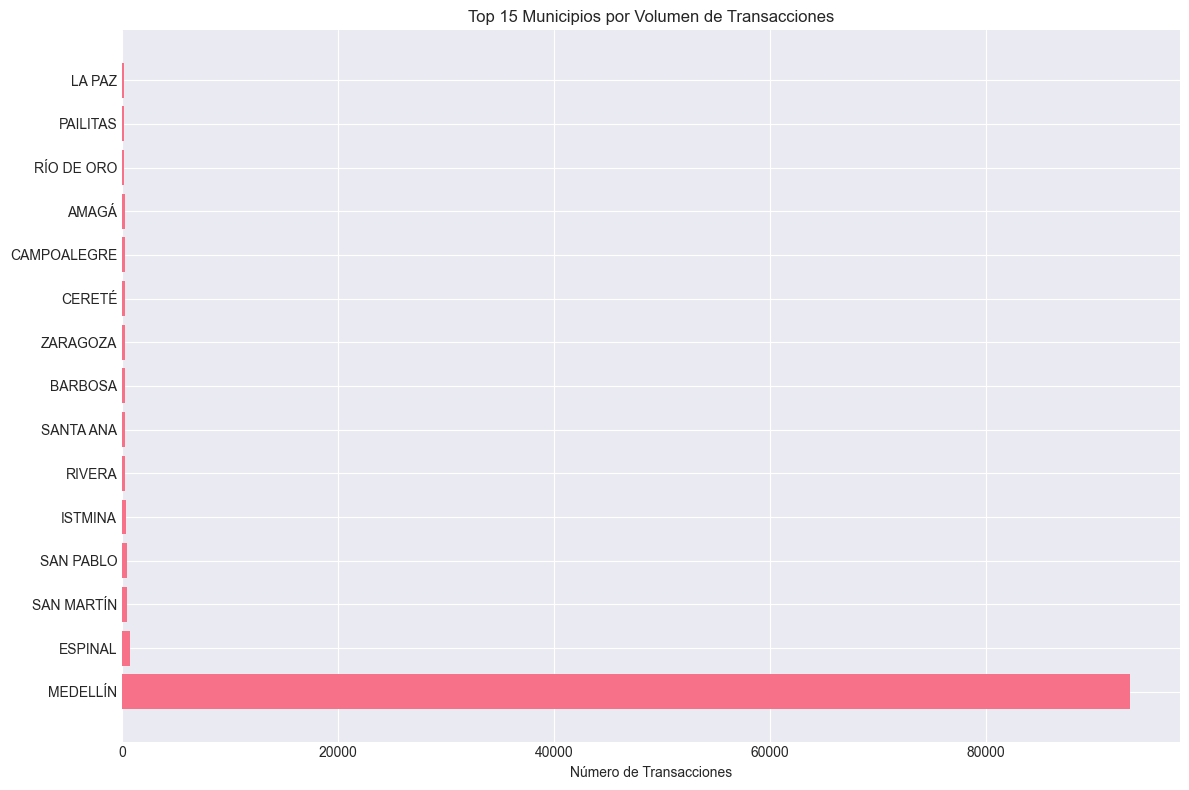

In [13]:
# Visualizar top municipios
plt.figure(figsize=(12, 8))
plt.barh(top_munis['MUNICIPIO'].to_list(), top_munis['Transacciones'].to_list())
plt.xlabel('Número de Transacciones')
plt.title('Top 15 Municipios por Volumen de Transacciones')
plt.tight_layout()
plt.show()

## 8. Análisis de Valores Monetarios

In [ ]:
# # Estadísticas de valores
# valor_stats = df_sample.select([
#     pl.col('VALOR').min().alias('Mínimo'),
#     pl.col('VALOR').max().alias('Máximo'),
#     pl.col('VALOR').mean().alias('Promedio'),
#     pl.col('VALOR').median().alias('Mediana'),
#     pl.col('VALOR').std().alias('Desv_Estándar')
# ])

# print("\nEstadísticas de Valores de Transacción:")
# print(valor_stats)

In [ ]:
# # Distribución de valores (filtrar outliers extremos para visualización)
# valores = df_sample.filter(pl.col('VALOR').is_not_null())['VALOR'].to_list()

# plt.figure(figsize=(14, 5))

# plt.subplot(1, 2, 1)
# plt.hist(valores, bins=50, edgecolor='black')
# plt.xlabel('Valor de Transacción')
# plt.ylabel('Frecuencia')
# plt.title('Distribución de Valores de Transacción')

# plt.subplot(1, 2, 2)
# plt.boxplot(valores)
# plt.ylabel('Valor de Transacción')
# plt.title('Boxplot de Valores')

# plt.tight_layout()
# plt.show()

## 9. Conclusiones Preliminares

**Observaciones clave:**
1. Dataset de gran volumen (~9.5 GB, millones de registros)
2. Identificar columnas con alta proporción de nulos
3. Variabilidad en valores monetarios requiere normalización
4. Concentración de transacciones en ciudades principales

**Próximos pasos:**
1. Limpieza de datos (notebook 02)
2. Estandarización (notebook 03)
3. Validación de calidad (notebook 04)